|      | Total | Active Region | Active Prominence | Prominence Eruption | NDA | BK  | Blanks |
|------|-------|---------------|-------------------|---------------------|-----|-----|--------|
| 2004 | 402   | 148           | 42                | 34                  | 70  | 103 | 5      |
| 2017 | 342   | 211           | 21                | 13                  | 20  | 14  | 50     |

In [162]:
import pandas as pb

x=pb.read_csv('ALL GRAPH DATA.csv')
#x.head()

Text(0.5, 0, 'Position Angle')

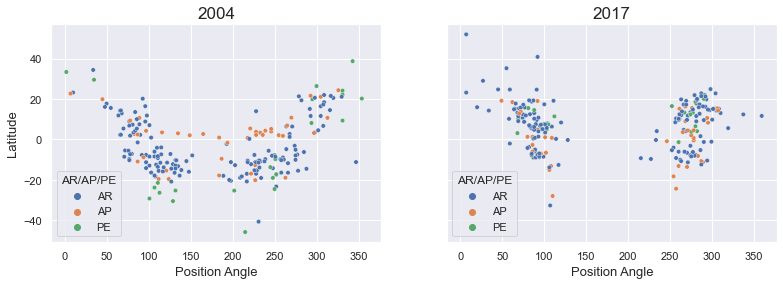

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, (ax,ax1) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(13,4))
#fig.suptitle('Latitude VS Position Angle', size=25)
ax.set_title('2004', size=17)
ax1.set_title('2017', size=17)


sns.scatterplot(ax=ax,x='PA',y='LAT',data=x,hue='AR/AP/PE',s=20);
ax.set_xlabel('Position Angle',size=13)
ax.set_ylabel('Latitude',size=13)

sns.scatterplot(ax=ax1,x='pa',y='lat',data=x,hue='AR/AP/PE',s=20);
ax1.set_xlabel('Position Angle',size=13)

Text(0.5, 0, 'Width')

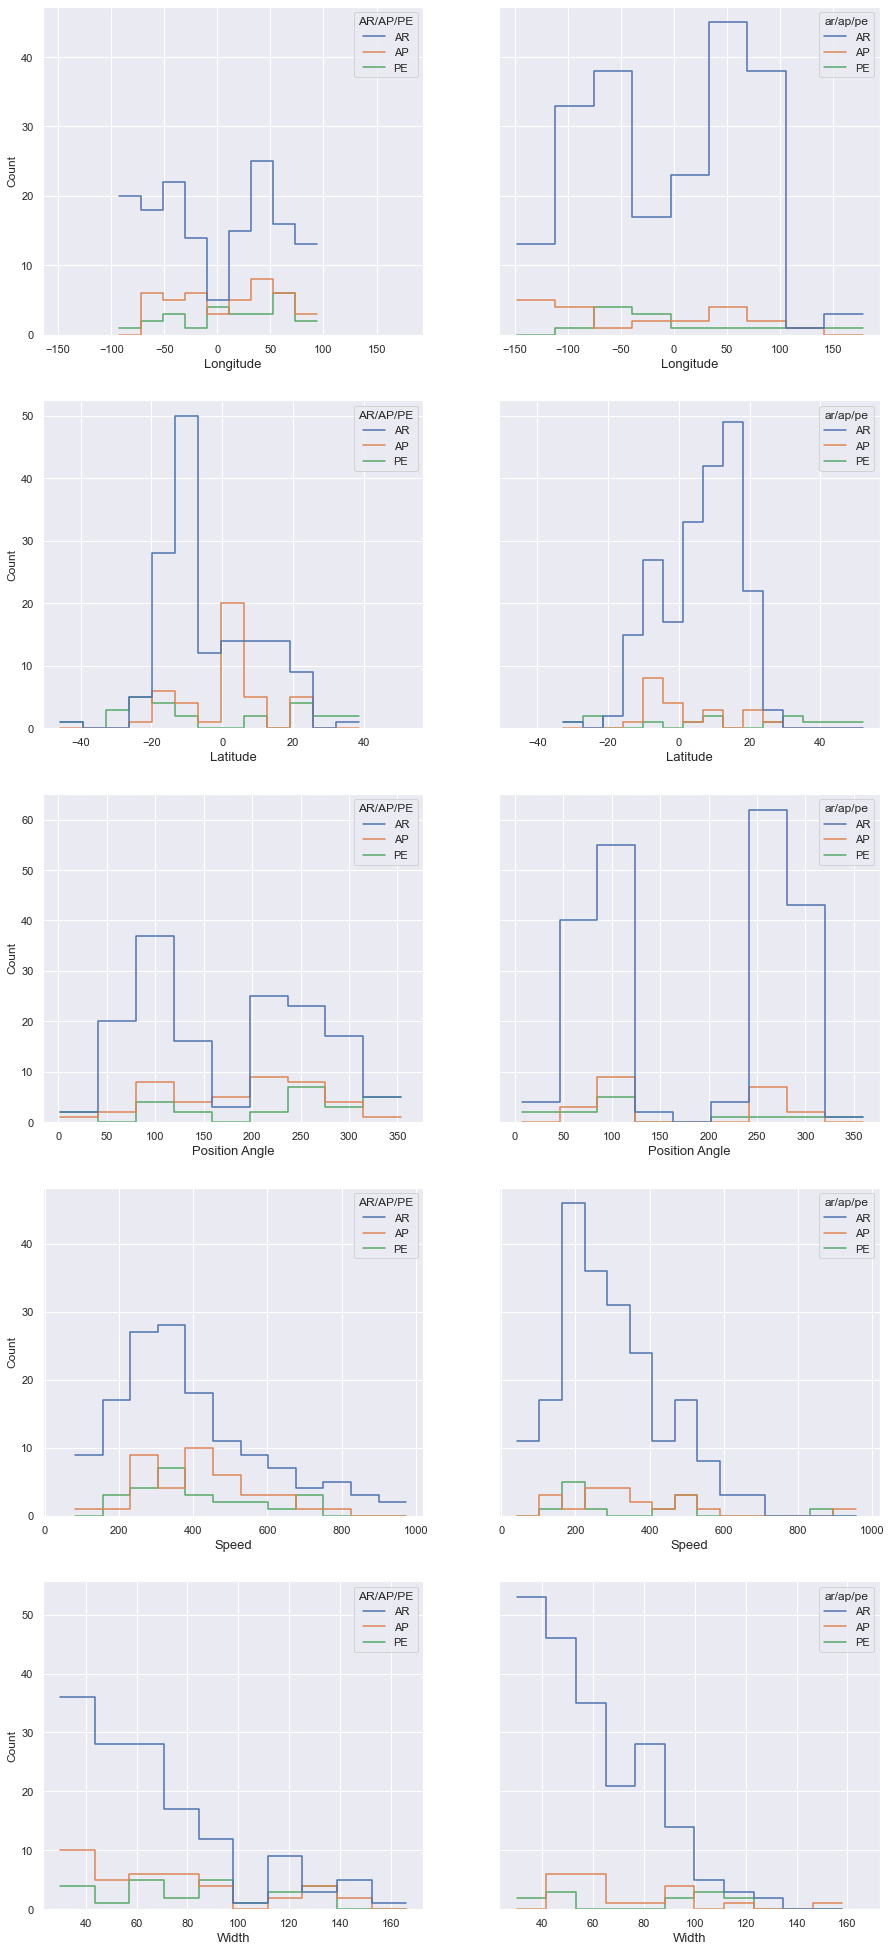

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ((ax,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9)) = plt.subplots(5, 2, sharex='row', sharey='row', figsize=(15,35))

sns.histplot(ax=ax,data=x, x="LONG", hue="AR/AP/PE",hue_order=("AR","AP","PE"),element="step",fill=False)
ax.set_xlabel('Longitude',size=13)
sns.histplot(ax=ax1,data=x, x="long", hue="ar/ap/pe",hue_order=("AR","AP","PE"),element="step",fill=False)
ax1.set_xlabel('Longitude',size=13)

sns.histplot(ax=ax2,data=x, x="LAT", hue="AR/AP/PE",hue_order=("AR","AP","PE"),element="step",fill=False)
ax2.set_xlabel('Latitude',size=13)
sns.histplot(ax=ax3,data=x, x="lat", hue="ar/ap/pe",hue_order=("AR","AP","PE"),element="step",fill=False)
ax3.set_xlabel('Latitude',size=13)

sns.histplot(ax=ax4,data=x, x="PA", hue="AR/AP/PE",hue_order=("AR","AP","PE"),element="step",fill=False)
ax4.set_xlabel("Position Angle",size=13)
sns.histplot(ax=ax5,data=x, x="pa", hue="ar/ap/pe",hue_order=("AR","AP","PE"),element="step",fill=False)
ax5.set_xlabel("Position Angle",size=13)

sns.histplot(ax=ax6,data=x, x="SPEED", hue="AR/AP/PE",hue_order=("AR","AP","PE"),element="step",fill=False)
ax6.set_xlabel('Speed',size=13)
sns.histplot(ax=ax7,data=x, x="speed", hue="ar/ap/pe",hue_order=("AR","AP","PE"),element="step",fill=False)
ax7.set_xlabel('Speed',size=13)

sns.histplot(ax=ax8,data=x, x="WIDTH", hue="AR/AP/PE",hue_order=("AR","AP","PE"),element="step",fill=False)
ax8.set_xlabel('Width',size=13)
sns.histplot(ax=ax9,data=x, x="width", hue="ar/ap/pe",hue_order=("AR","AP","PE"),element="step",fill=False)
ax9.set_xlabel('Width',size=13)


[0.04047818]
395.314005462014
[1.565221]
209.31904368047645


Text(0, 0.5, 'Speed')

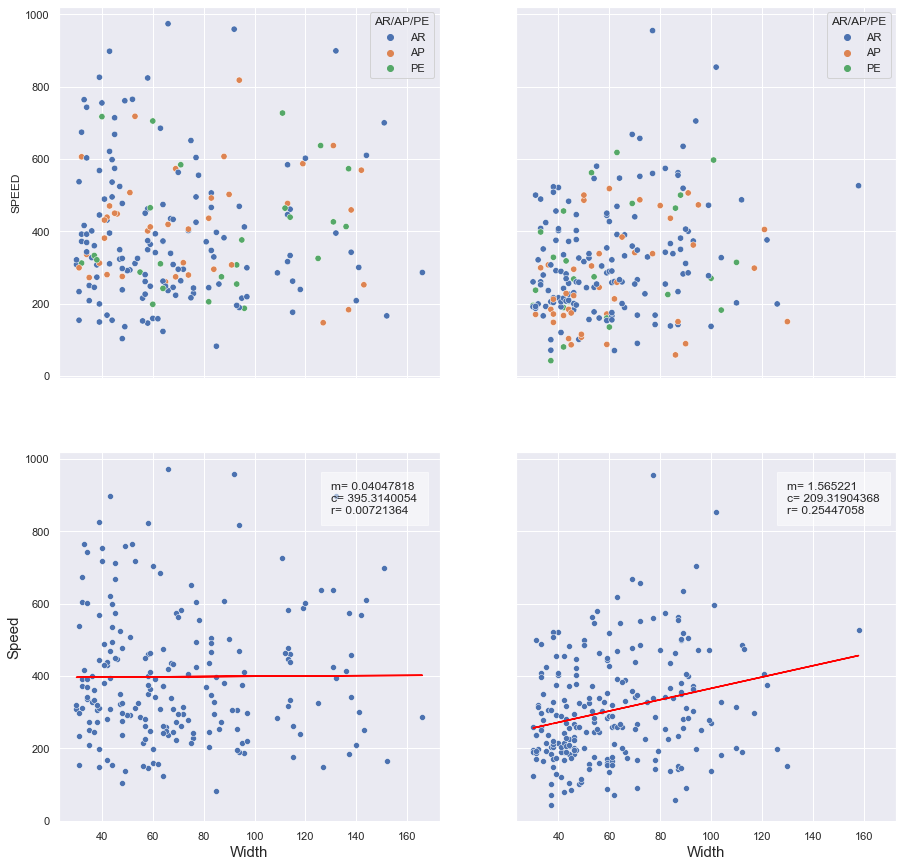

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.linear_model import LinearRegression


fig, ((ax,ax1) , (ax2,ax3))= plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,15))


sns.scatterplot(ax=ax,x='WIDTH',y='SPEED',data=x,hue='AR/AP/PE',s=40);
ax.set_xlabel('Width',size=13)

sns.scatterplot(ax=ax1,x='width',y='speed',data=x,hue='AR/AP/PE',s=40);
ax1.set_xlabel('Width',size=13)

speed_arr=x["SPEED"].tolist()
width_arr=x["WIDTH"].tolist()
s_arr=[x for x in speed_arr if math.isnan(x)==False ]
w_arr=[x for x in width_arr if math.isnan(x)==False ]
sna=np.array(s_arr,dtype=np.float64)
wna=np.array(w_arr,dtype=np.float64)
linreg=LinearRegression()
wna=wna.reshape(-1,1)
linreg.fit(wna,sna)
sna_pred=linreg.predict(wna)
print(linreg.coef_)
print(linreg.intercept_)

speed_arr1=x["speed"].tolist()
width_arr1=x["width"].tolist()
s_arr1=[x for x in speed_arr1 if math.isnan(x)==False ]
w_arr1=[x for x in width_arr1 if math.isnan(x)==False ]
sna1=np.array(s_arr1,dtype=np.float64)
wna1=np.array(w_arr1,dtype=np.float64)
linreg=LinearRegression()
wna1=wna1.reshape(-1,1)
linreg.fit(wna1,sna1)
sna1_pred=linreg.predict(wna1)
print(linreg.coef_)
print(linreg.intercept_)



wna = wna.flatten()
sns.scatterplot(ax=ax2,x=wna,y=sna);
ax2.plot(wna,sna_pred,color='red')
ax2.text(130, 850, 'm= 0.04047818 \nc= 395.3140054\nr= 0.00721364', fontsize = 12,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
ax2.set_xlabel("Width",size=15)
ax2.set_ylabel("Speed",size=15)

wna1 = wna1.flatten()
sns.scatterplot(ax=ax3,x=wna1,y=sna1);
ax3.plot(wna1,sna_pred1,color='red')
ax3.text(130, 850, 'm= 1.565221 \nc= 209.31904368\nr= 0.25447058', fontsize = 12,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
ax3.set_xlabel("Width",fontsize=15)
ax3.set_ylabel("Speed",fontsize=15)

In [154]:
np.corrcoef(wna,sna)


array([[1.        , 0.00721364],
       [0.00721364, 1.        ]])

In [155]:
np.corrcoef(wna1,sna1)

array([[1.        , 0.25447058],
       [0.25447058, 1.        ]])